# Two Sample Mean Tests

In [1]:
import numpy as np
import random 
from random import sample
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
import seaborn as sns
sns.set_theme()

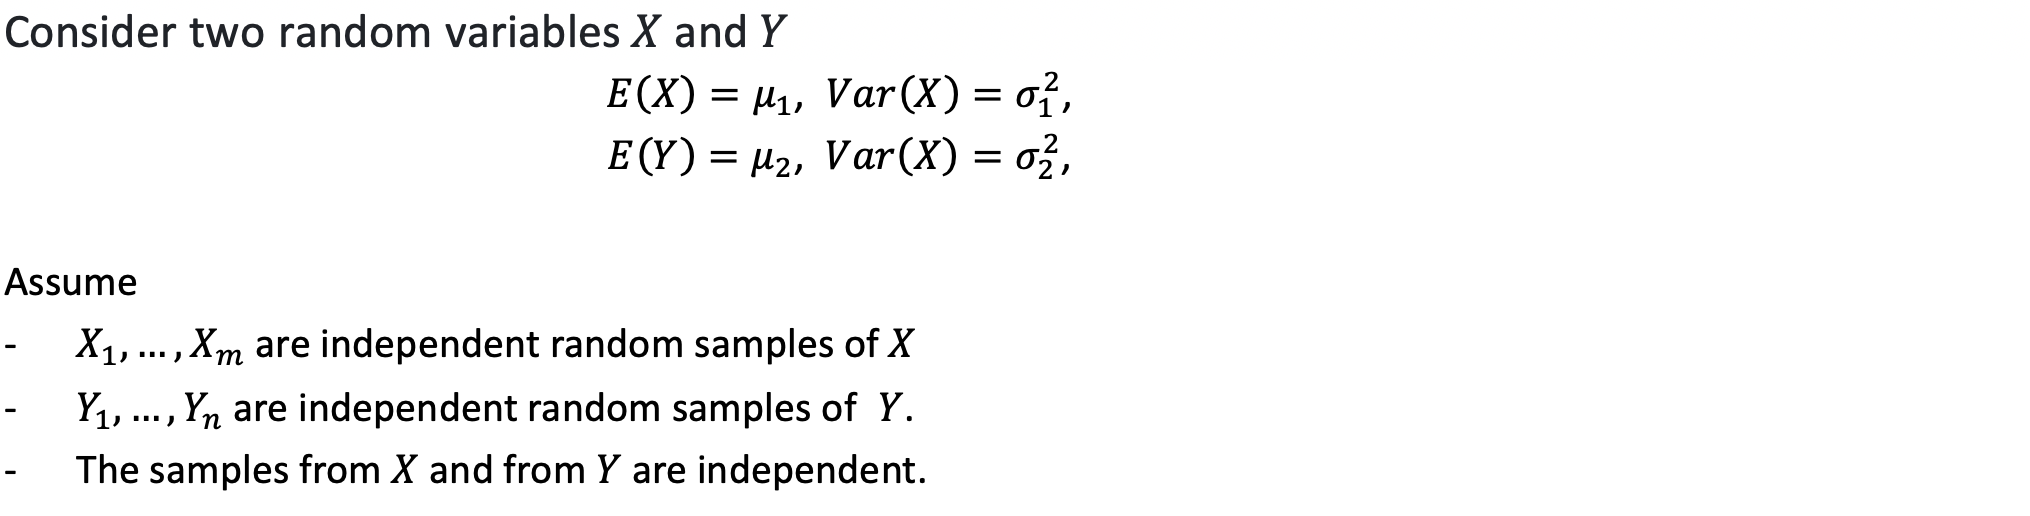

### The goal of this study is to conduct and compare several two-sample tests (introduced below) under different scenarios
1. Equal/unequal sample size
2. Equal/unequal variance
3. The true mean of X and Y, could be either same (null hypothesis is true, rejection is related to Type 1 Error), or different (null hypothesis is false, rejection is related to Type 2 error)

# Contents of this note
## 1. Several two-sample tests in the literature
## 2. Codes for comparing the two-sample tests by simulation analysis
## 3. Results of the simulation-based analysis

# Part 1 - Several two-sample tests in the literature
There are multiple two-sample tests in the literature. The derivations of the test statistics and the distribution of these statistics under the null hypothesis are not discussed. The links and snapshots are from [the article about Student's t-test in wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test).

## (1) Wald test

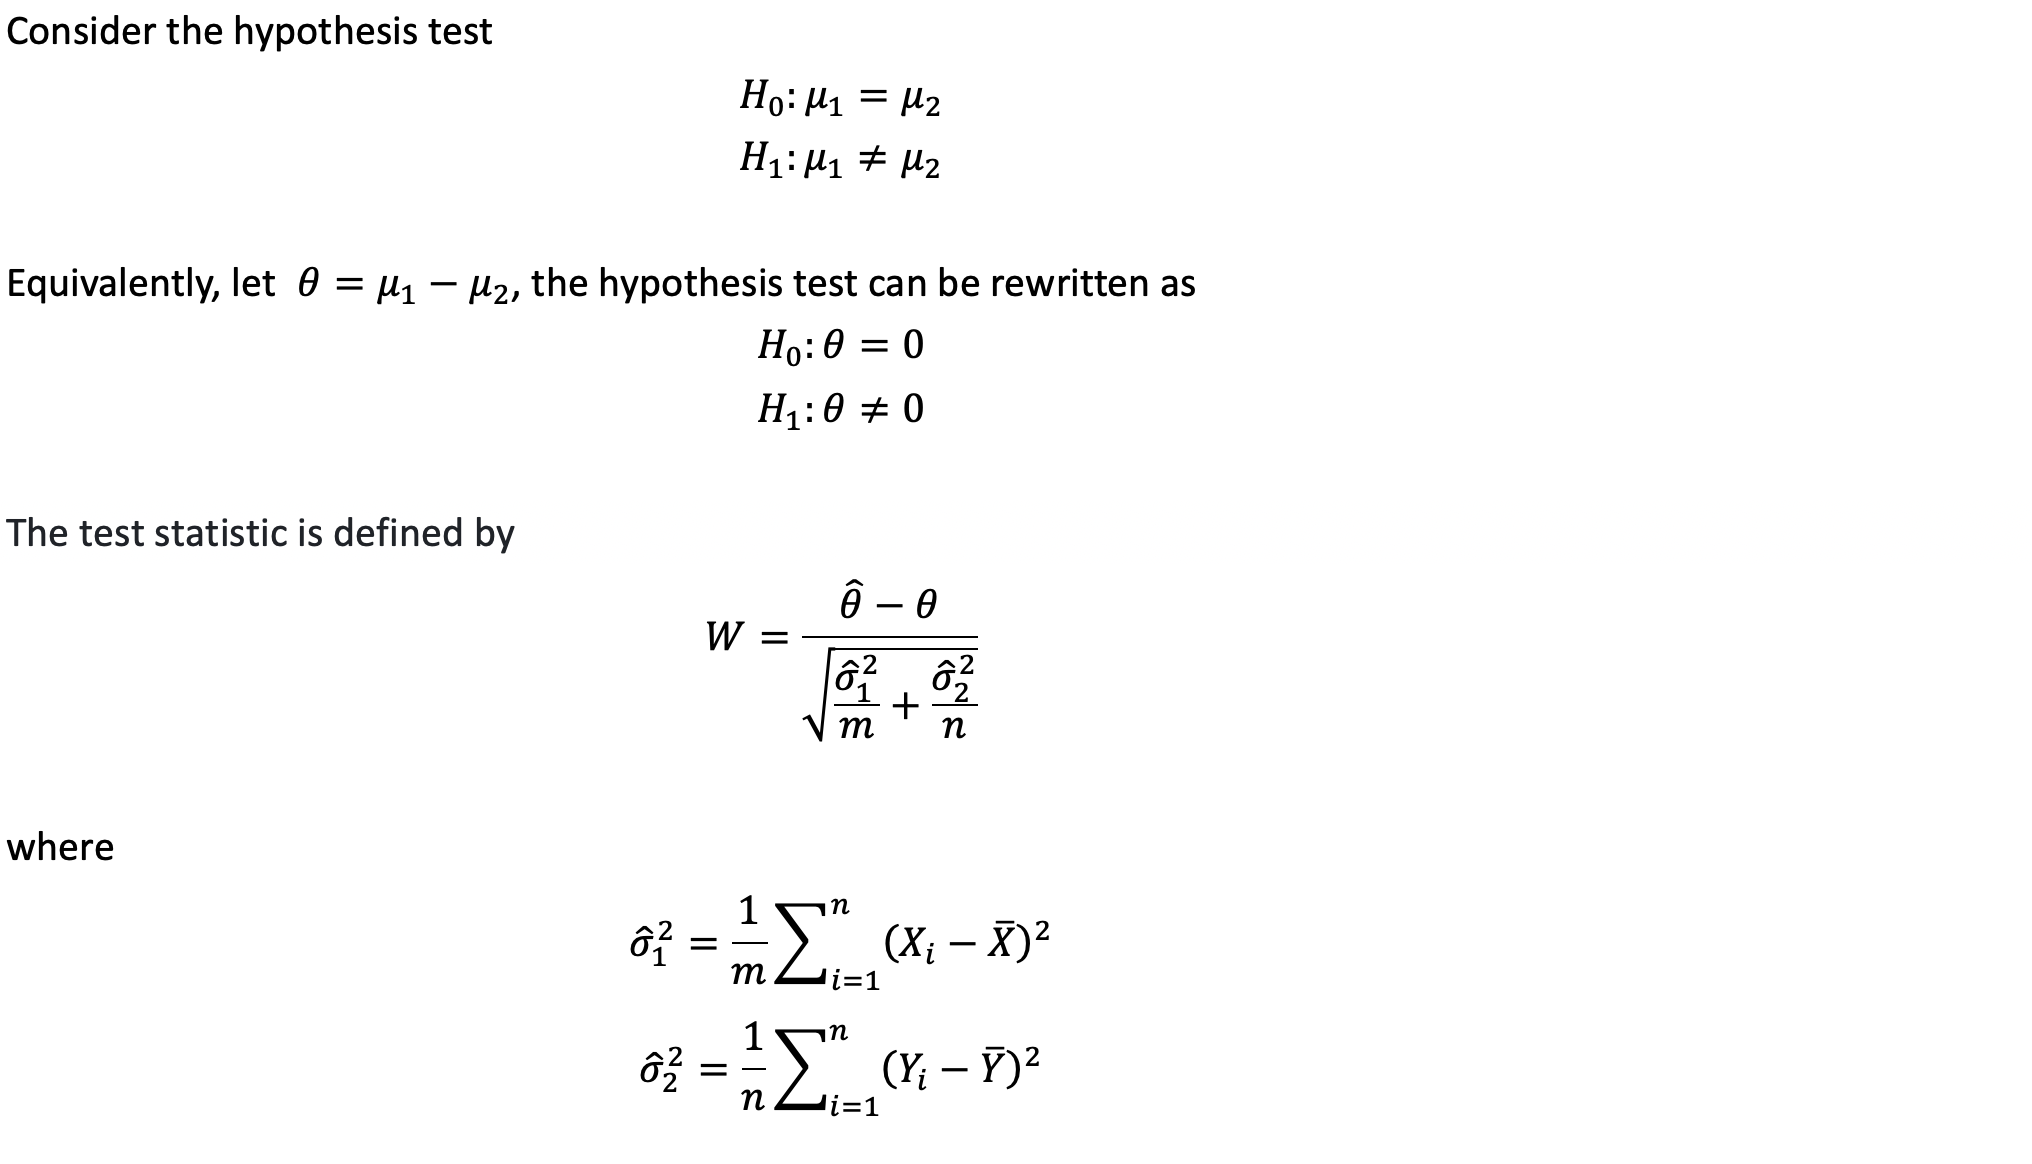
**The codes below conduct this test.**

In [3]:
def wald_ts(data_x,data_y):
    alpha  = 0.05
    critical_value = norm.ppf(1-alpha/2)
    x_mean = np.mean(data_x)
    x_var  = np.var(data_x)
    x_s2   = np.var(data_x,ddof=1)    
    size_x = len(data_x)
    y_mean = np.mean(data_y)
    y_var  = np.var(data_y)
    y_s2   = np.var(data_y,ddof=1)
    size_y = len(data_y)
    ts      = abs(x_mean-y_mean)/np.sqrt(x_var/size_x+y_var/size_y)
    reject = int(ts>critical_value)
    return ts,reject

## (2) T test 1 - Equal sample sizes and variance
### [Link](https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_sample_sizes_and_variance)

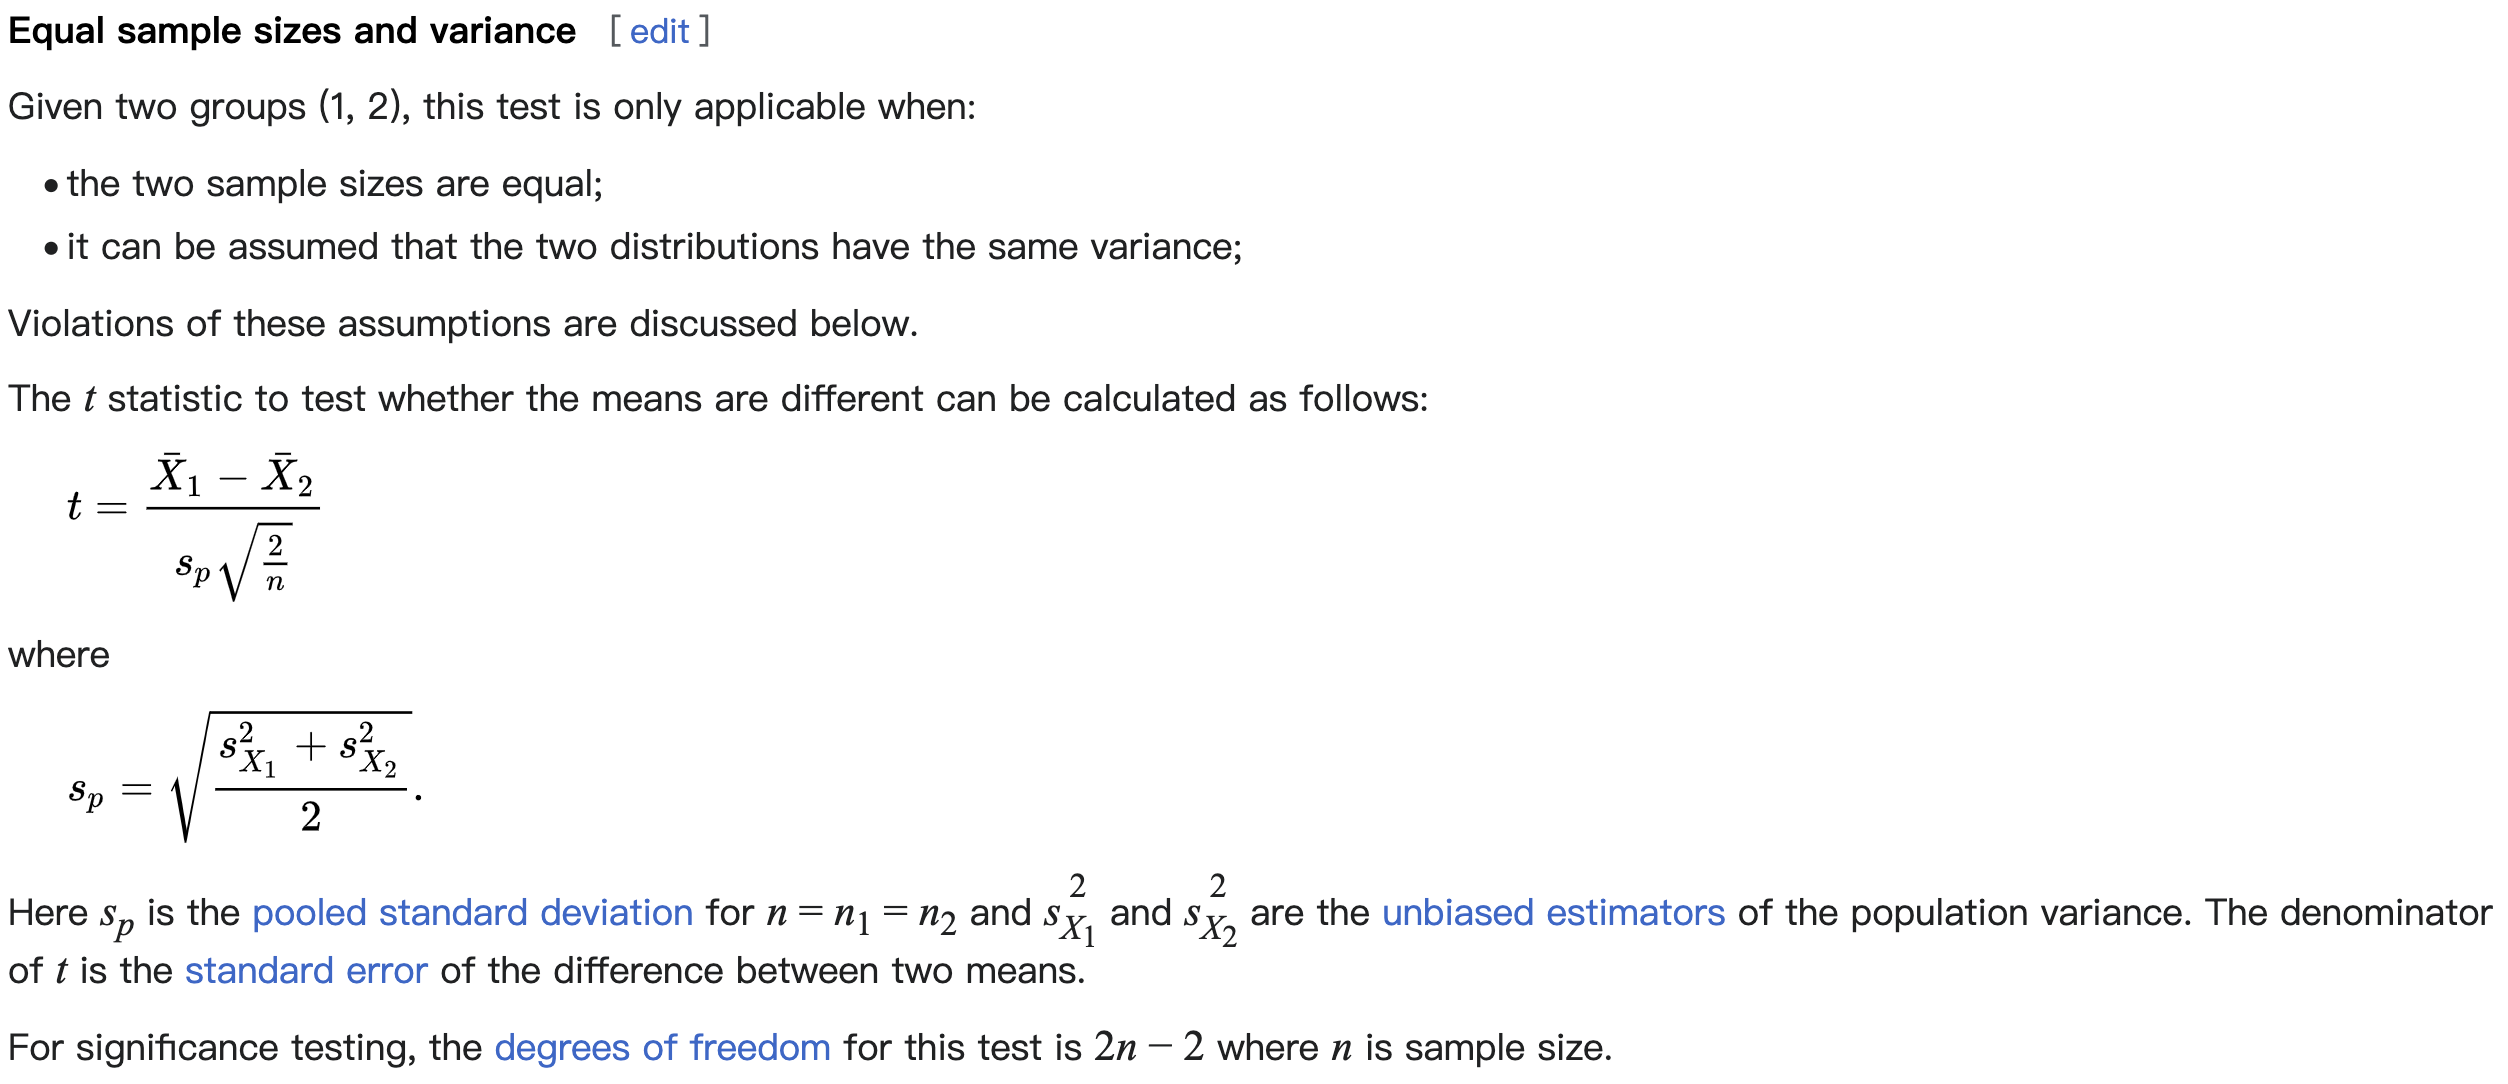

**The codes below conduct this test.**

In [4]:
def t_ts_1(data_x,data_y):
    alpha  = 0.05
    critical_value = t.ppf(1-alpha/2, df=2*len(data_x)-2)
    x_mean = np.mean(data_x)
    x_var  = np.var(data_x)
    x_s2   = np.var(data_x,ddof=1)    
    size_x = len(data_x)
    y_mean = np.mean(data_y)
    y_var  = np.var(data_y)
    y_s2   = np.var(data_y,ddof=1)
    size_y = len(data_y)
    sp     = np.sqrt(0.5*(x_s2+y_s2))
    ts     = abs(x_mean-y_mean)/(sp*np.sqrt(2/size_x))
    reject = int(ts>critical_value)
    return ts,reject

## (3) T Test 2 - Equal or unequal sample sizes, similar variances 
### [Link](https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_similar_variances_(1/2_%3C_sX1/sX2_%3C_2))
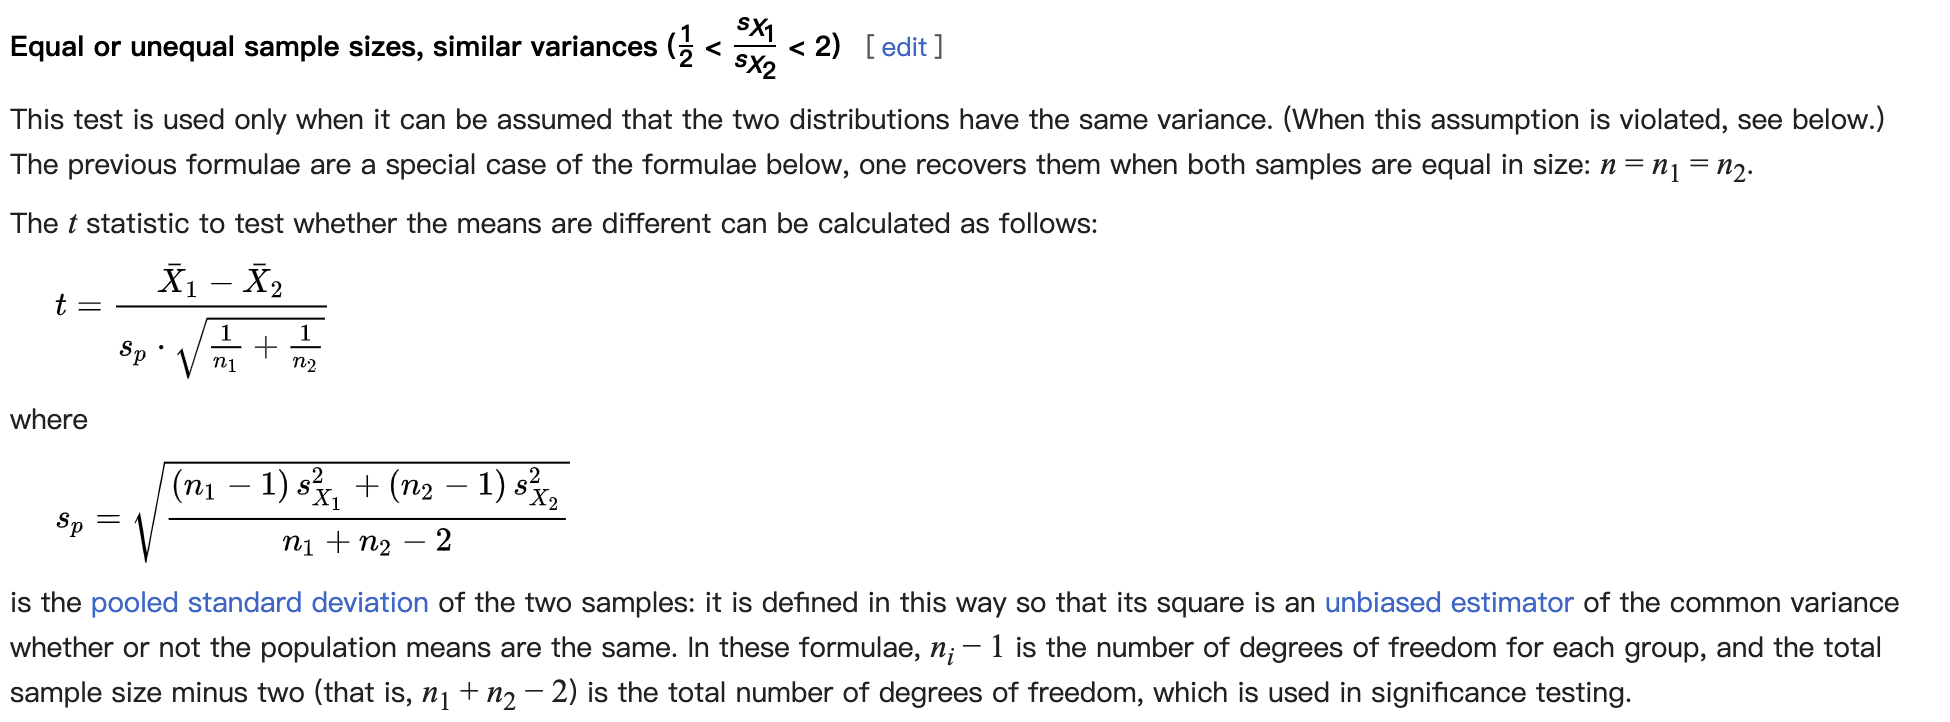

**The codes below conduct this test.**

In [5]:
def t_ts_2(data_x,data_y):
    alpha  = 0.05
    critical_value = t.ppf(1-alpha/2, df=2*len(data_x)-2)
    x_mean = np.mean(data_x)
    x_var  = np.var(data_x)
    x_s2   = np.var(data_x,ddof=1)    
    size_x = len(data_x)
    y_mean = np.mean(data_y)
    y_var  = np.var(data_y)
    y_s2   = np.var(data_y,ddof=1)
    size_y = len(data_y)
    sp     = np.sqrt(((size_x-1)*x_s2+(size_y-1)*y_s2)/(size_x+size_y-2))
    ts     = abs(x_mean-y_mean)/(sp*np.sqrt(1/size_x+1/size_y))
    reject = int(ts>critical_value)
    return ts,reject

## (4) T Test  3 - Equal or unequal sample sizes, unequal variances
### [Link](https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_unequal_variances_(sX1_%3E_2sX2_or_sX2_%3E_2sX1))

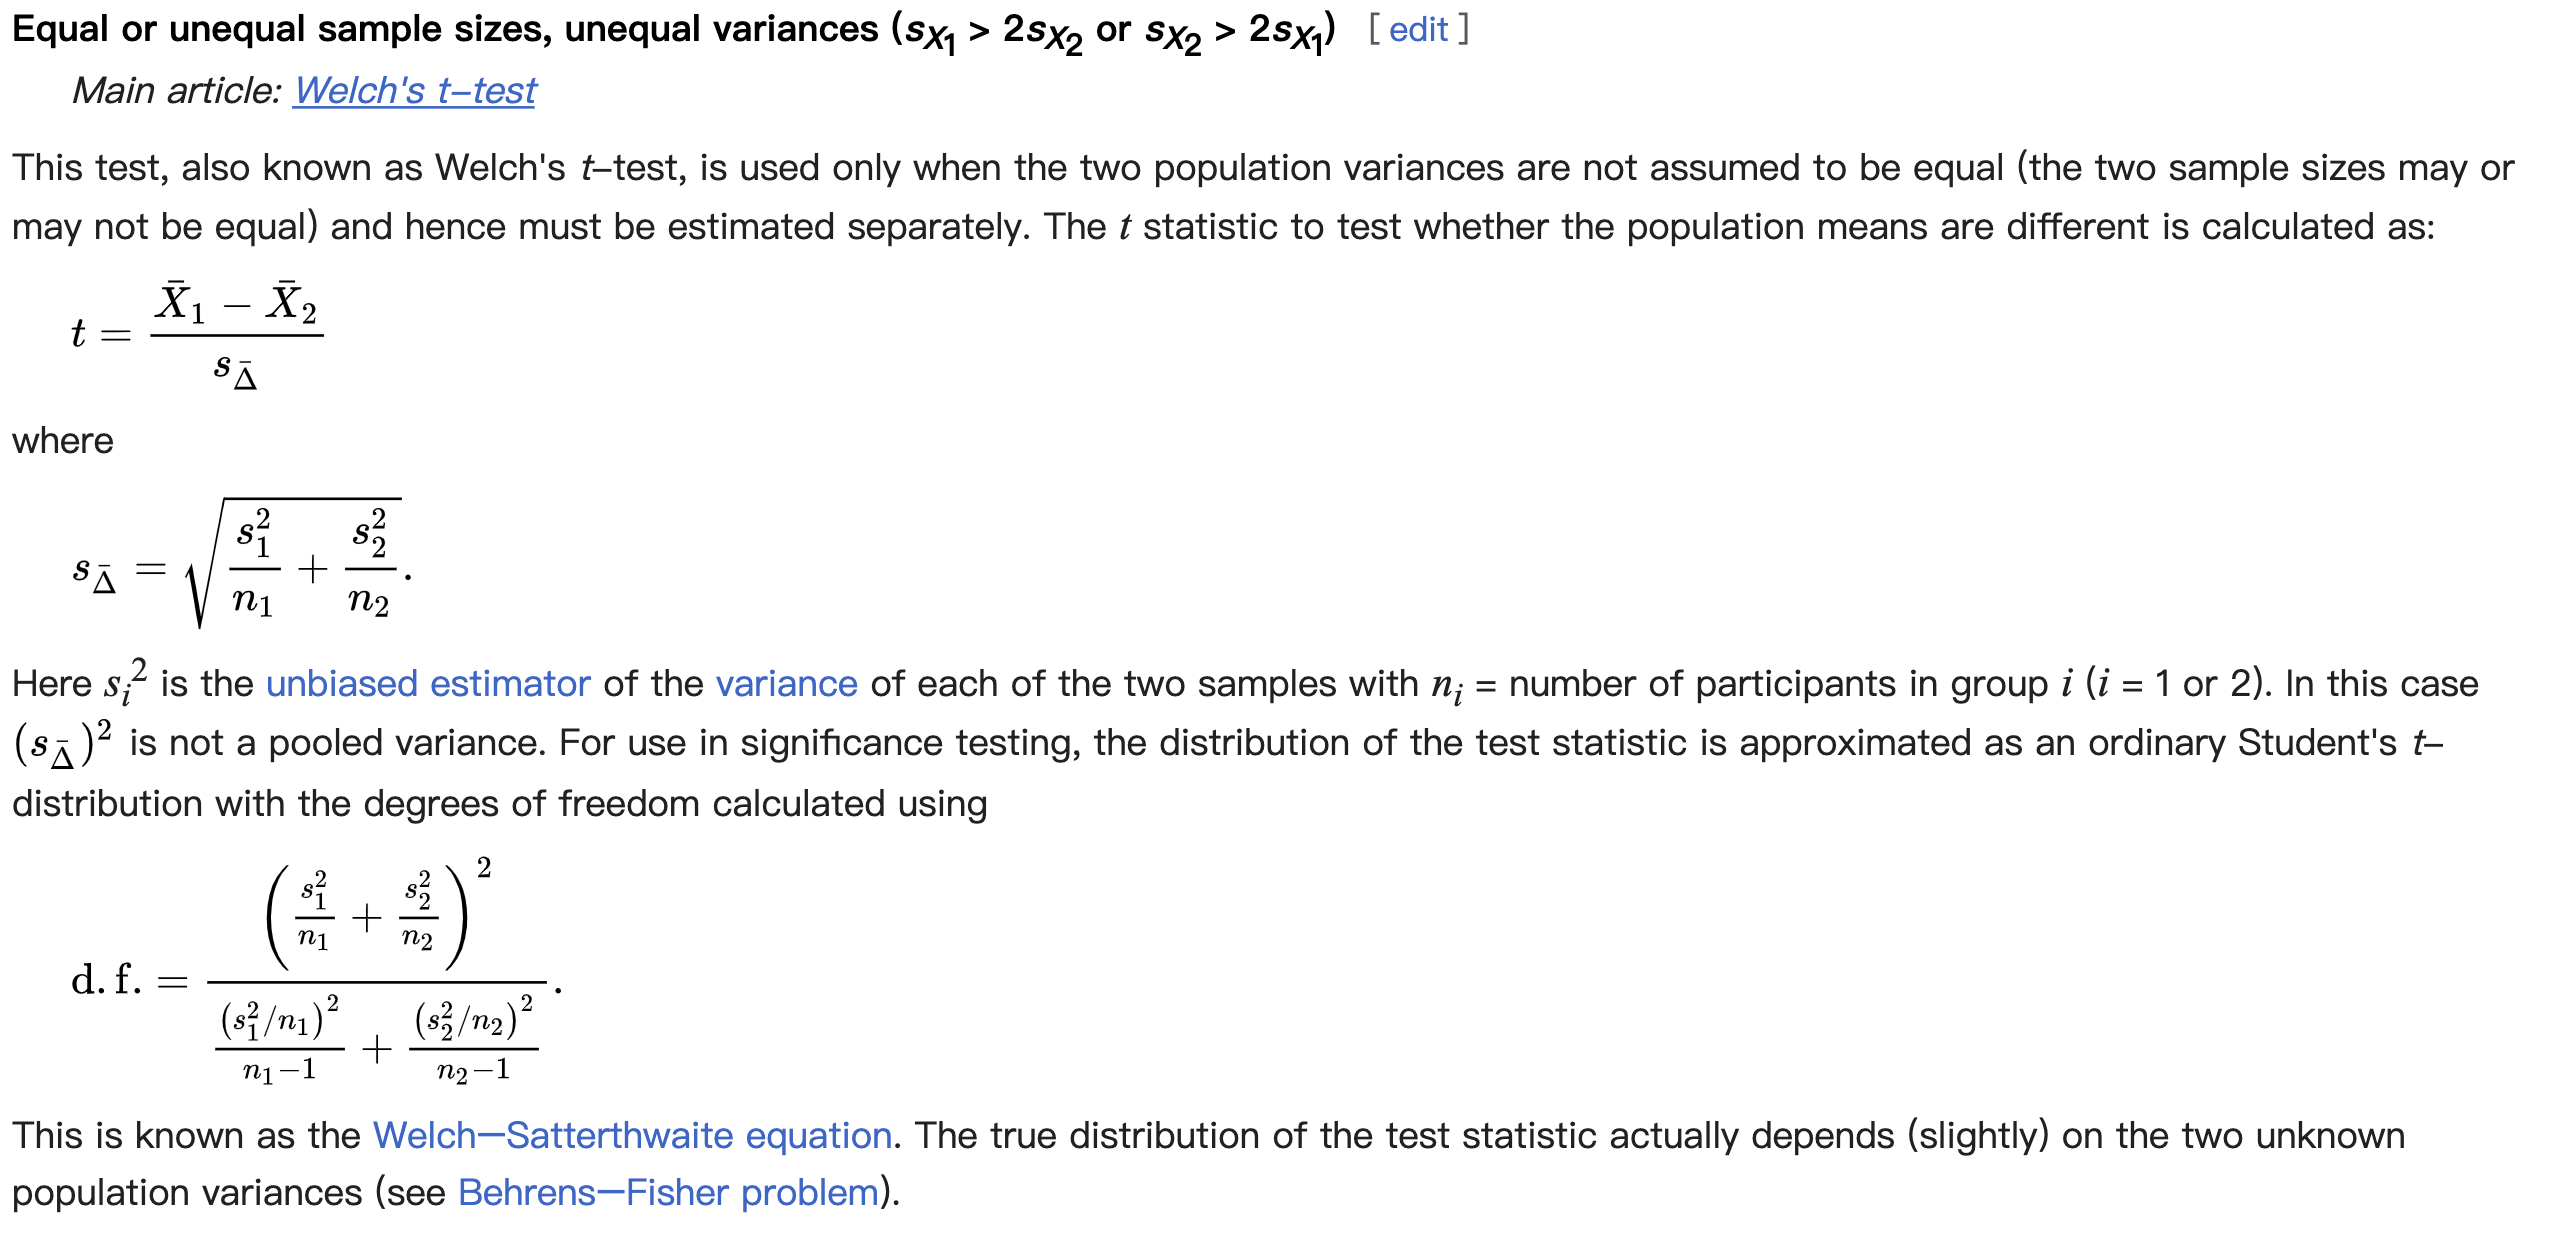

**The codes below conduct this test.**

In [6]:
def t_ts_3(data_x,data_y):
    alpha          = 0.05
    x_mean = np.mean(data_x)
    x_var  = np.var(data_x)
    x_s2   = np.var(data_x,ddof=1)    
    size_x = len(data_x)
    y_mean = np.mean(data_y)
    y_var  = np.var(data_y)
    y_s2   = np.var(data_y,ddof=1)
    size_y = len(data_y)
    sp     = np.sqrt(((size_x-1)*x_s2+(size_y-1)*y_s2)/(size_x+size_y-2))
    ts     = abs(x_mean-y_mean)/(sp*np.sqrt(1/size_x+1/size_y))
    dof    = (x_s2/size_x+y_s2/size_y)**2/((x_s2/size_x)**2/(size_x-1)+(y_s2/size_y)**2/(size_y-1))
    critical_value = t.ppf(1-alpha/2, df=dof)
    reject = int(ts>critical_value)
    return ts,reject

# Part 2 - Codes for comparing the two-sample tests by simulation analysis

### The function below performs a two sample mean test, given that
- The two random variables both follow Normal distribution.
- The **true mean** of X and Y, could be either same (H0 is true, rejection rate implies type 1 error), or different (rejection rate implies type 2 error)
- The **true variances** of X and Y, could be same or different
- The **sample sizes** of X and Y, could be same or different
- The four two-sample testing methods described above: Wald test, t test 1, t test 2, t test 3 are conducted.

In [7]:
def two_sample_test(mu_x,sigma2_x,size_x,mu_y,sigma2_y,size_y,method):
    n_experiment   = 1000
    results        = pd.DataFrame(columns=['ts','reject'])
    summary        = pd.DataFrame(columns=['size_x','size_y','h0'])

    for e in range(n_experiment):
        data_x   = np.random.normal(loc=mu_x,scale=np.sqrt(sigma2_x),size=size_x) 
        data_y   = np.random.normal(loc=mu_y,scale=np.sqrt(sigma2_y),size=size_y) 
        if method == 'wald_ts': 
            ts,reject = wald_ts(data_x,data_y)
        if method == 't_ts_1':
            ts,reject = t_ts_1(data_x,data_y)
        if method == 't_ts_2':
            ts,reject = t_ts_2(data_x,data_y)
        if method == 't_ts_3':
            ts,reject = t_ts_3(data_x,data_y)
        results.loc[e,'ts']     = ts
        results.loc[e,'reject'] = reject
    
    summary.loc[0,'size_x'] = size_x
    summary.loc[0,'size_y'] = size_y
    if mu_x==mu_y:
        summary.loc[0,'h0']           = 'True'
        summary.loc[0,'type_1_error'] = results['reject'].mean()
    else: 
        summary.loc[0,'h0']           = 'False'
        summary.loc[0,'type_2_error'] = 1- results['reject'].mean()
    
    return results,summary

#### This function works like this. In this example, the true paramaters and the sample sizes for the two random variables are shown as below (they are specified in the function):
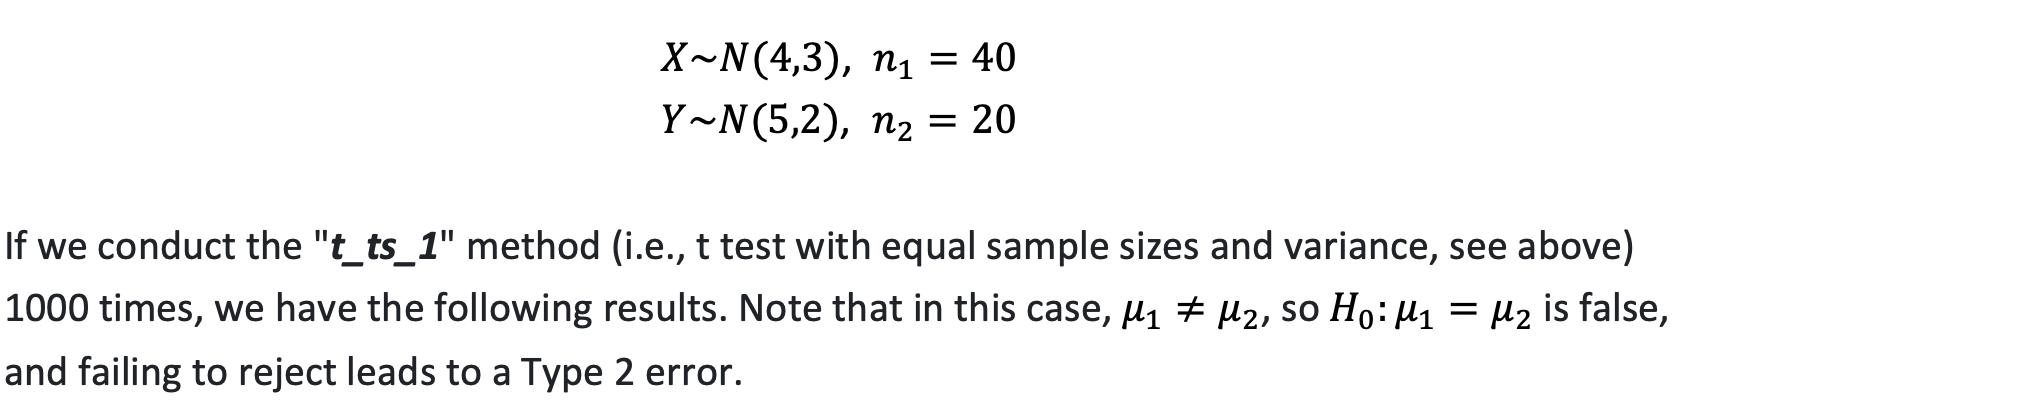

In [8]:
two_sample_test(mu_x=4, sigma2_x=3,size_x=40,
                mu_y=5,sigma2_y=2,size_y=20,
                method = 't_ts_1')

(           ts reject
 0    1.293599      0
 1     2.05337      1
 2    3.908962      1
 3    1.385509      0
 4    3.037802      1
 ..        ...    ...
 995  2.838326      1
 996  1.592401      0
 997  2.191736      1
 998  4.529527      1
 999  2.996447      1
 
 [1000 rows x 2 columns],
   size_x size_y     h0  type_2_error
 0     40     20  False         0.249)

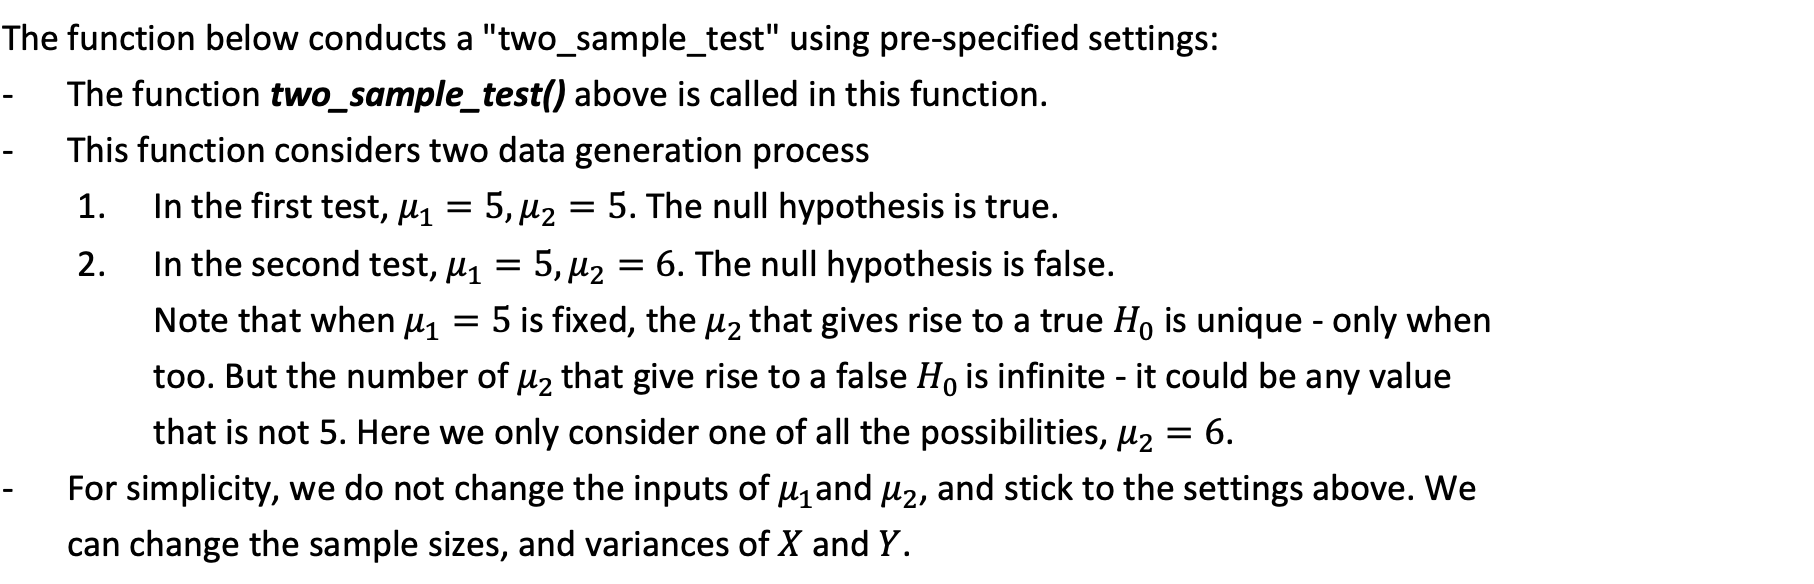

In [9]:
def two_sample_test_experiment(sample_size_x_list,sample_size_y_list,
                               sigma_2_x,sigma_2_y,
                               method):
    mu_x      = 5
    mu_y1     = 5
    mu_y2     = 6
    ### H0 is true
    for s in range(len(sample_size_x_list)):
        results_now,summary_now = two_sample_test(mu_x=mu_x, sigma2_x=sigma_2_x,size_x=sample_size_x_list[s],
                                                  mu_y=mu_y1,sigma2_y=sigma_2_y,size_y=sample_size_y_list[s],
                                                  method = method)
        if s==0:
            summary_t = summary_now
        else:
            summary_t = pd.concat([summary_t,summary_now],axis=0)
    ### H0 is false
    for s in range(len(sample_size_x_list)):
        results_now,summary_now = two_sample_test(mu_x=mu_x, sigma2_x=sigma_2_x,size_x=sample_size_x_list[s],
                                                  mu_y=mu_y2,sigma2_y=sigma_2_y,size_y=sample_size_y_list[s],
                                                  method = method)
        if s==0:
            summary_f = summary_now
        else:
            summary_f = pd.concat([summary_f,summary_now],axis=0)
    summary = summary_t.drop(['h0'],axis=1).merge(summary_f.drop(['h0'],axis=1),on=['size_x','size_y'])
    summary['x_var']  = sigma_2_x
    summary['y_var']  = sigma_2_y

    summary['sample size'] = 'Equal' if sample_size_x_list==sample_size_y_list else 'Unequal'
    summary['variance']    = 'Equal' if sigma_2_x==sigma_2_y else 'Unequal'
            
    summary['method'] = method
    return summary

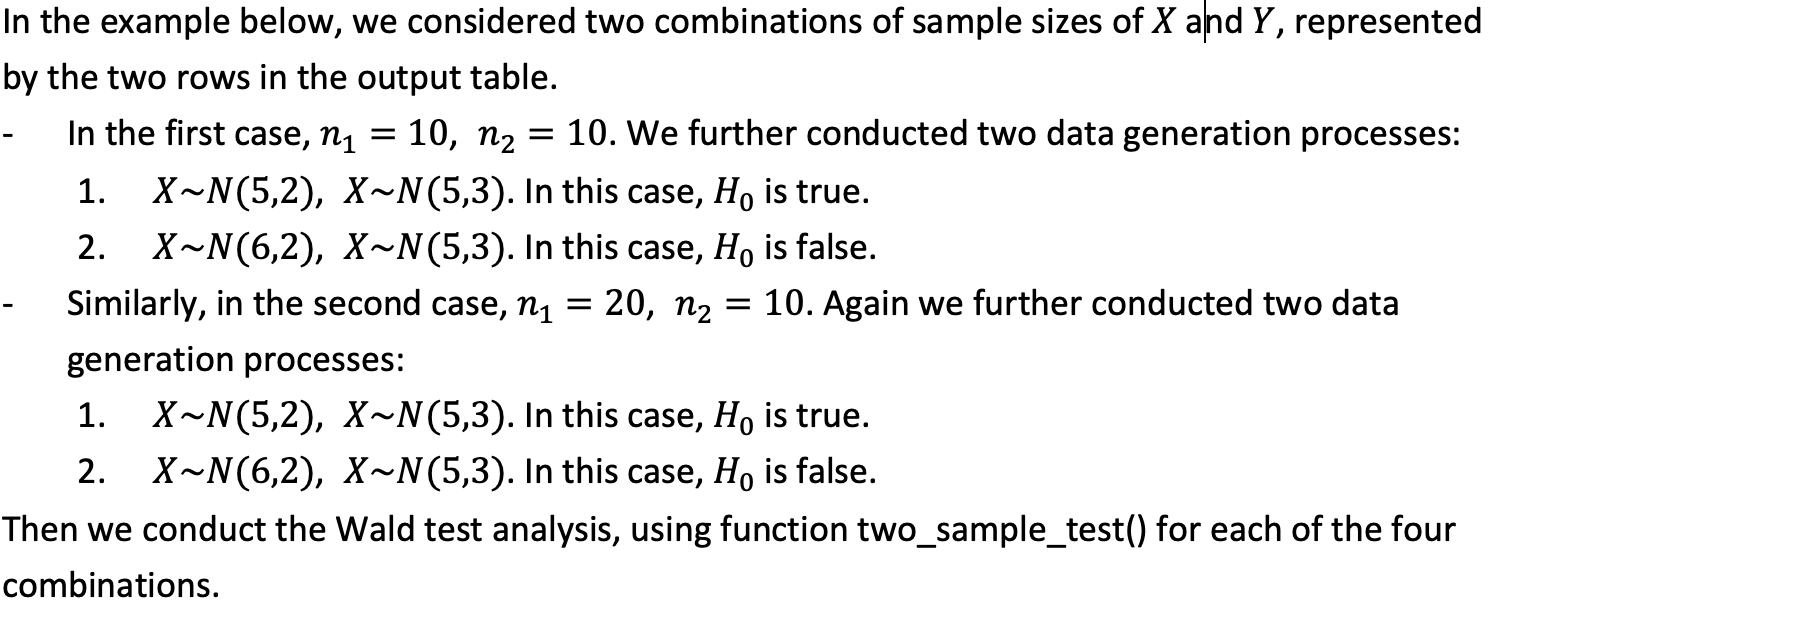

In [10]:
two_sample_test_experiment(sample_size_x_list=[10,20],
                           sample_size_y_list=[10,30],
                           sigma_2_x=2,
                           sigma_2_y=3,
                           method='wald_ts')

,size_x,size_y,type_1_error,type_2_error,x_var,y_var,sample size,variance,method
0,10,10,0.062,0.640,2,3,Unequal,Unequal,wald_ts
1,20,30,0.062,0.383,2,3,Unequal,Unequal,wald_ts


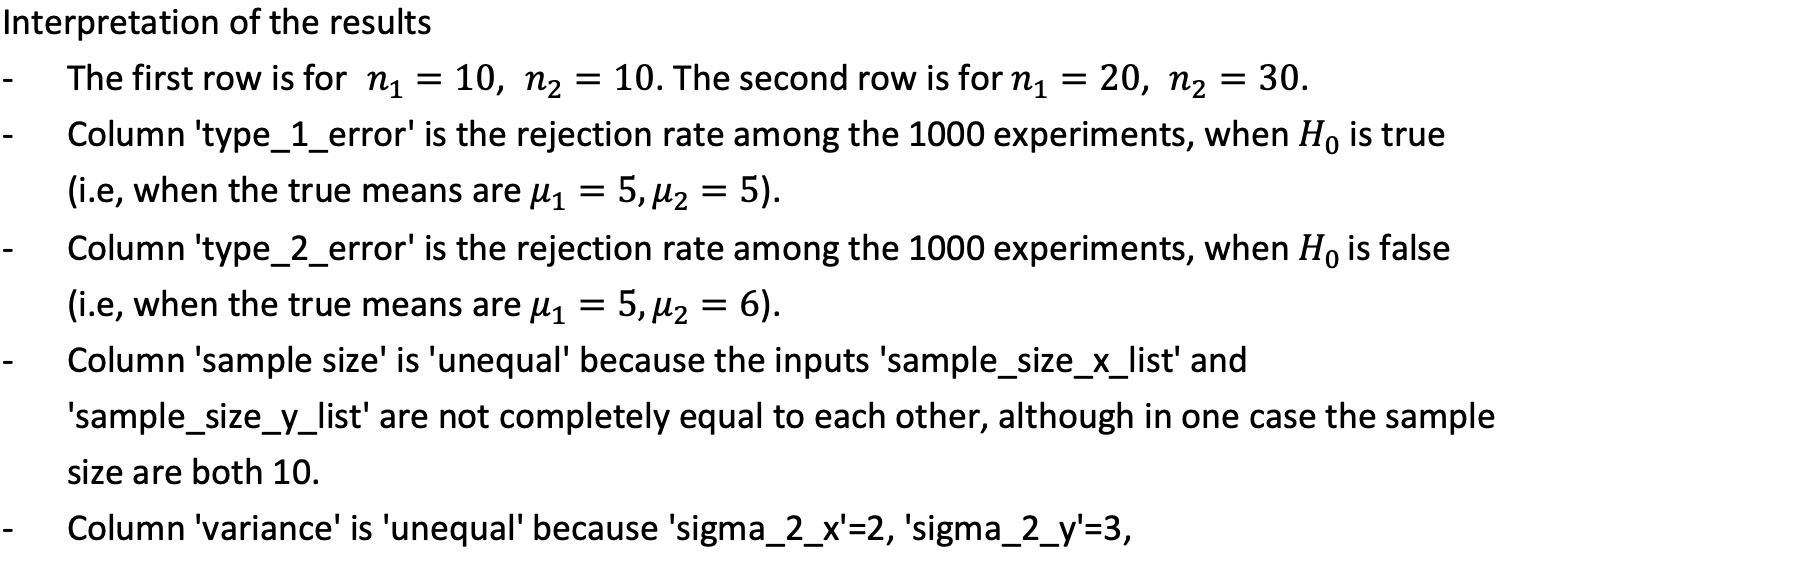

Codes that create labels, for plotting

In [11]:
def create_label(x):
    if x == 'wald_ts':
        label = 'Wald Test'
    if x == 't_ts_1':
        label = 'T Test 1: Equal sample sizes and equal variance'
    if x == 't_ts_2':
        label = 'T Test 2: Equal or unequal sample sizes, similar variances'
    if x == 't_ts_3':
        label = 'T Test 3: Equal or unequal sample sizes, unequal variances'
    return (label)   

# Part 3 - Results of the simulation-based analysis
## Case 1: Equal variance, equal sample size
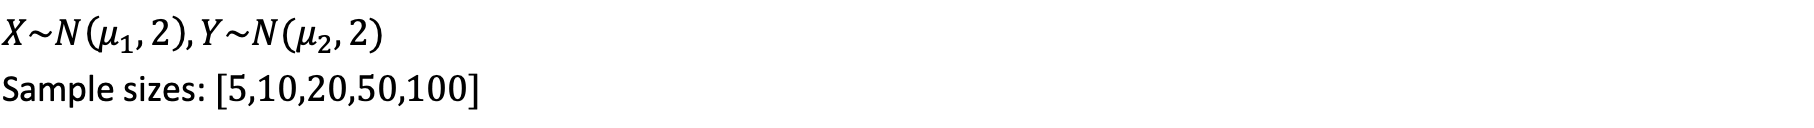

In [12]:
sample_size_list_1 = [5,10,20,50,100]
sample_size_list_2 = [50,50,50,50,50]
sigma_2_x          = 2
sigma_2_y          = 2
wald_result = two_sample_test_experiment(sample_size_list_1,sample_size_list_1,sigma_2_x,sigma_2_y,'wald_ts')
t1_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_1,sigma_2_x,sigma_2_y,'t_ts_1')
t2_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_1,sigma_2_x,sigma_2_y,'t_ts_2')
t3_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_1,sigma_2_x,sigma_2_y,'t_ts_3')
combined_results = pd.concat([wald_result,t1_result,t2_result,t3_result],axis=0)
combined_results['label'] = combined_results['method'].apply(create_label)

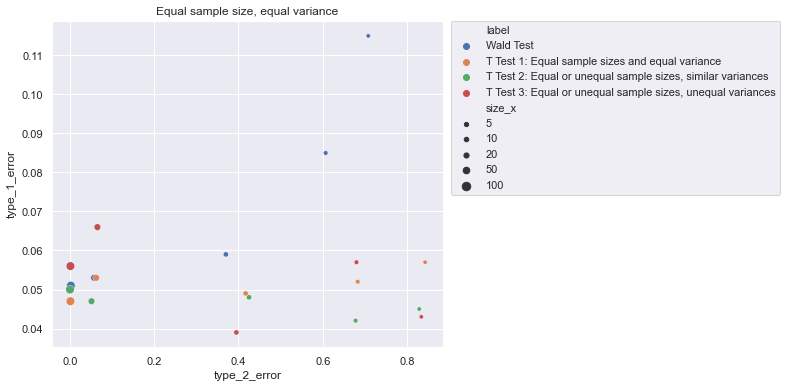

In [13]:
plt.figure(figsize=(7,6))
sns.scatterplot(data = combined_results,
                x="type_2_error",y="type_1_error", 
                hue="label", size="size_x")
plt.title('Equal sample size, equal variance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

## Case 2: Unequal variance, equal sample size
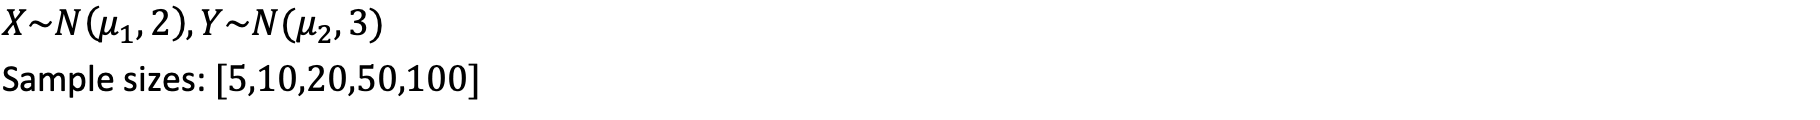

In [14]:
sample_size_list_1 = [5,10,20,50,100]
sample_size_list_2 = [50,50,50,50,50]
sigma_2_x          = 2
sigma_2_y          = 3
wald_result = two_sample_test_experiment(sample_size_list_1,sample_size_list_1,sigma_2_x,sigma_2_y,'wald_ts')
t1_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_1,sigma_2_x,sigma_2_y,'t_ts_1')
t2_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_1,sigma_2_x,sigma_2_y,'t_ts_2')
t3_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_1,sigma_2_x,sigma_2_y,'t_ts_3')
combined_results          = pd.concat([wald_result,t1_result,t2_result,t3_result],axis=0)
combined_results['label'] = combined_results['method'].apply(create_label)

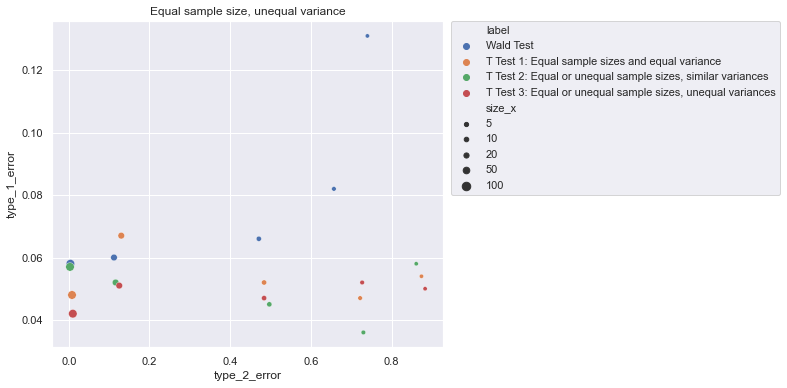

In [15]:
plt.figure(figsize=(7,6))
sns.scatterplot(data = combined_results,
                x="type_2_error",y="type_1_error", 
                hue="label", size="size_x")
plt.title('Equal sample size, unequal variance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

## Case 3: Equal variance, unequal sample size
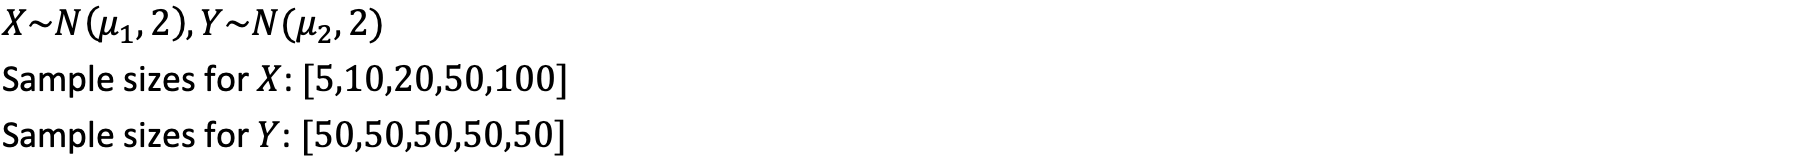

In [16]:
sample_size_list_1 = [5,10,20,50,100]
sample_size_list_2 = [50,50,50,50,50]
sigma_2_x          = 2
sigma_2_y          = 2
wald_result = two_sample_test_experiment(sample_size_list_1,sample_size_list_2,sigma_2_x,sigma_2_y,'wald_ts')
t1_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_2,sigma_2_x,sigma_2_y,'t_ts_1')
t2_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_2,sigma_2_x,sigma_2_y,'t_ts_2')
t3_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_2,sigma_2_x,sigma_2_y,'t_ts_3')
combined_results = pd.concat([wald_result,t1_result,t2_result,t3_result],axis=0)
combined_results['label'] = combined_results['method'].apply(create_label)

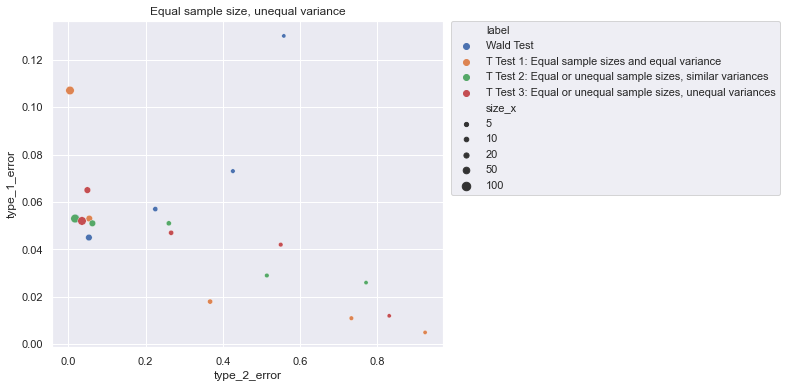

In [17]:
plt.figure(figsize=(7,6))
sns.scatterplot(data = combined_results,
                x="type_2_error",y="type_1_error", 
                hue="label", size="size_x")
plt.title('Equal sample size, unequal variance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

## Case 4: Unequal variance, unequal sample size
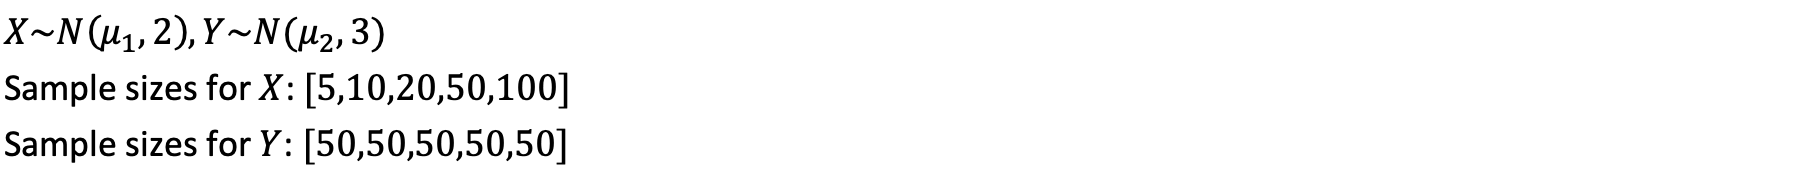

In [18]:
sample_size_list_1 = [5,10,20,50,100]
sample_size_list_2 = [50,50,50,50,50]
sigma_2_x          = 2
sigma_2_y          = 3
wald_result = two_sample_test_experiment(sample_size_list_1,sample_size_list_2,sigma_2_x,sigma_2_y,'wald_ts')
t1_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_2,sigma_2_x,sigma_2_y,'t_ts_1')
t2_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_2,sigma_2_x,sigma_2_y,'t_ts_2')
t3_result   = two_sample_test_experiment(sample_size_list_1,sample_size_list_2,sigma_2_x,sigma_2_y,'t_ts_3')
combined_results = pd.concat([wald_result,t1_result,t2_result,t3_result],axis=0)
combined_results['label'] = combined_results['method'].apply(create_label)

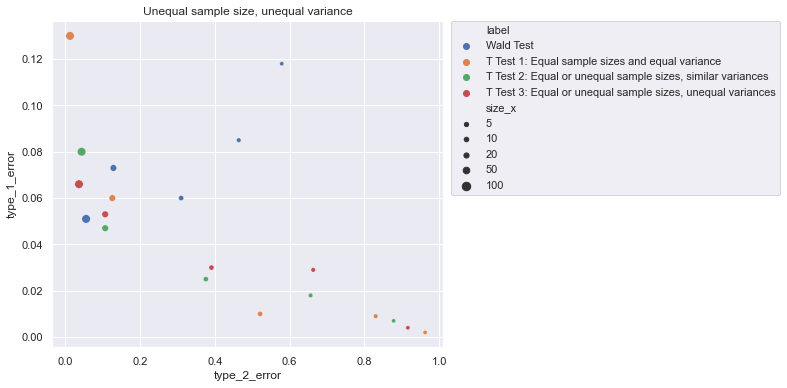

In [19]:
plt.figure(figsize=(7,6))
sns.scatterplot(data = combined_results,
                x="type_2_error",y="type_1_error", 
                hue="label", size="size_x")
plt.title('Unequal sample size, unequal variance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()